# Masking the Data
Placing a limit on the frequency may help you achieve an optimal result in the fitting process.

Even on a good dataset, we can get a sizable error if we take into consideration every single frequency of data. This is because there can be some data that is considered an outlier. Take for example, 'DE_40_1_30.mpt' which by all accounts, is a good dataset without any unusual spikes or drops in the data. Let's take a look at if we were to import all frequencies in the file.

In [2]:
#Locate the data, prepare for import of the MPT file
#Import necessary packaging
from utils.tools import *
path=r"C:\Users\cjang\Desktop\\"
data = ['DE_40_1_30.mpt']
ex_mpt = mpt_data(path,data)

No handles with labels found to put in legend.


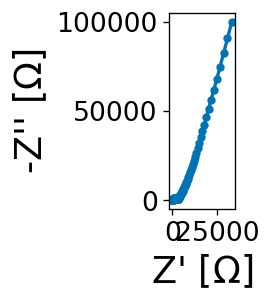

In [3]:
ex_mpt.mpt_plot()

If we take the guessing iterator and run it on this dataset, the guessing iterator has to find a fitting equation that satisfies every single point on this set, or something that is close.

In [4]:
Rs_guess = 40

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2

ex_mpt.guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)

  =  0.399
    C(fs, fs2) = -0.379
    C(fs, R2)  =  0.365
    C(Rs, n2)  = -0.353
    C(n, fs)   =  0.302
    C(Rs, fs2) = -0.291
    C(Rs, R2)  =  0.281
None
ITERATION NO:  985
total error:  4.661156460805671e-10
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 240
    # variables        = 7
    chi-square         = 309619.885
    reduced chi-square = 1328.84071
    Akaike info crit   = 1732.99081
    Bayesian info crit = 1757.35529
[[Variables]]
    Rs:   0.40000000 +/- 39.5481986 (9887.05%) (init = 0.4)
    R:    3966.77131 +/- 99.5935031 (2.51%) (init = 3966.771)
    n:    0.65000000 +/- 0.02376554 (3.66%) (init = 0.65)
    fs:   11354.5503 +/- 729.407646 (6.42%) (init = 11354.55)
    R2:   2586062.43 +/- 399497.780 (15.45%) (init = 2586062)
    n2:   0.81097575 +/- 0.00354298 (0.44%) (init = 0.8109757)
    fs2:  0.02156687 +/- 0.00448916 (20.82%) (init = 0.02156687)
[[Correlations]] (unreported correlations are < 0.100)
    

[0.4000000000005591,
 3966.7713134113706,
 0.6500000011409431,
 11354.550297315369,
 2586062.429650645,
 0.8109757489369762,
 0.021566873408073846]

Because the iterator cut out at 1000 iterations and return the set of coefficients at that state, we cannot say with full confidence that this is the best fit because it didn't necessarily satisfy the threshold. If we graph this 'optimal' set of coefficients, we aren't guaranteed a great fitting graph...

No handles with labels found to put in legend.
c:\Users\cjang\Desktop\impedance_data\python_notebooks\utils\tools.py:220: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  ax.plot(self.circuit_fit[i].real, -self.circuit_fit[i].imag, lw=0, marker='o', ms=8, mec='r', mew=1, mfc='none', label='')
c:\Users\cjang\Desktop\impedance_data\python_notebooks\utils\tools.py:220: FutureWarning: `imag` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.imag(ser.to_numpy())` or `ser.to_numpy().imag`.
  ax.plot(self.circuit_fit[i].real, -self.circuit_fit[i].imag, lw=0, marker='o', ms=8, mec='r', mew=1, mfc='none', label='')


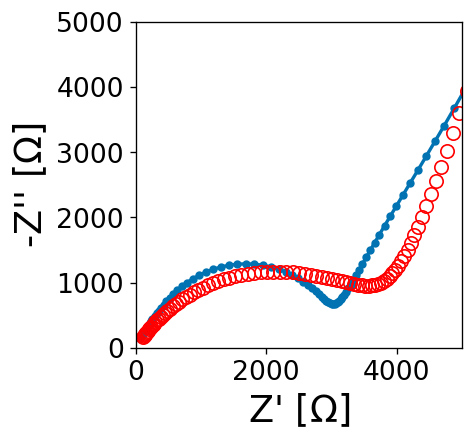

In [5]:
ex_mpt.set_new_gph_dims(8,8)
ex_mpt.mpt_plot(fitting = 'on', x_window = [0,5000], y_window = [0,5000])

What we can do is eliminate some of the frequencies from the file to make it easier to get a more accurate graph. But how do we determine which frequencies to drop from the file? 

# Linear Kramer Kronig Analysis

The Linear Kramer Kronig Analysis determines the causality, linearity, and stability of the dataset. It'll help you determine a mask by examining the residual graph. Running the function ex_mpt.LinKK() will allow you to see where your residuals are fluctuating the most. From here you can determine on your own what your boundaries should be.

cycle || No. RC-elements ||   u
[1]            10            0.87
c:\Users\cjang\Desktop\impedance_data\python_notebooks\utils\tools.py:568: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  self.KK_rr_re.append(residual_real(re=self.df[i].re, fit_re=self.KK_circuit_fit[i].real, fit_im=-self.KK_circuit_fit[i].imag)) #relative residuals for the real part
c:\Users\cjang\Desktop\impedance_data\python_notebooks\utils\tools.py:568: FutureWarning: `imag` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.imag(ser.to_numpy())` or `ser.to_numpy().imag`.
  self.KK_rr_re.append(residual_real(re=self.df[i].re, fit_re=self.KK_circuit_fit[i].real, fit_im=-self.KK_circuit_fit[i].imag)) #relative residuals for the real part
c:\Users\cjang\Desktop\impedance_data\python_notebooks\utils\tools.py:569: FutureWarning: `r

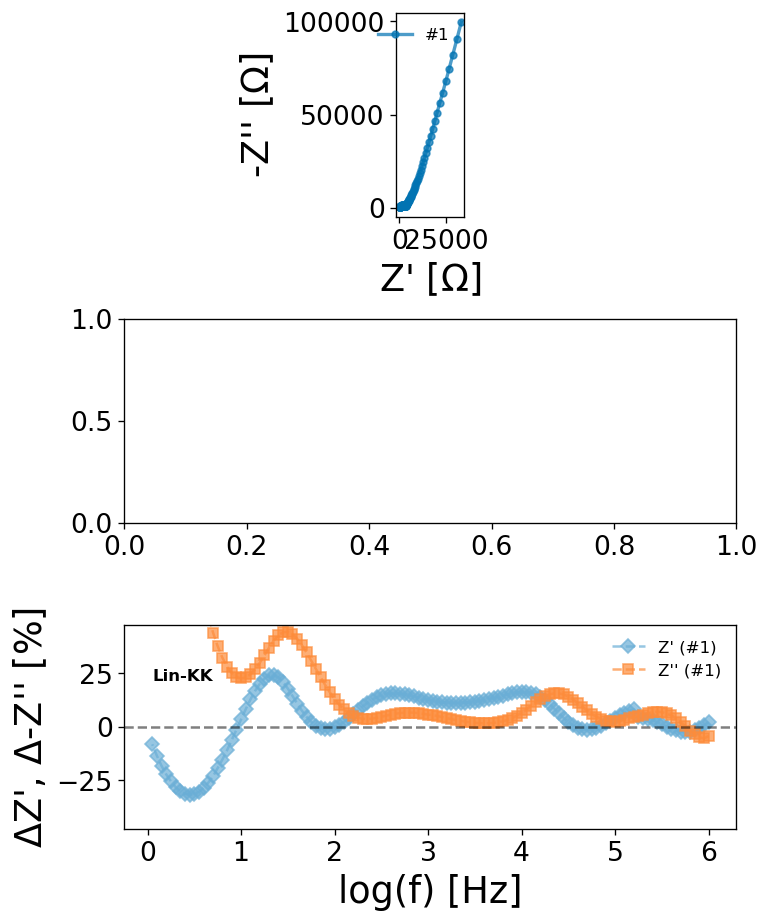

In [6]:
#Will be updated
ex_mpt.Lin_KK(plot = 'w_data')

No handles with labels found to put in legend.


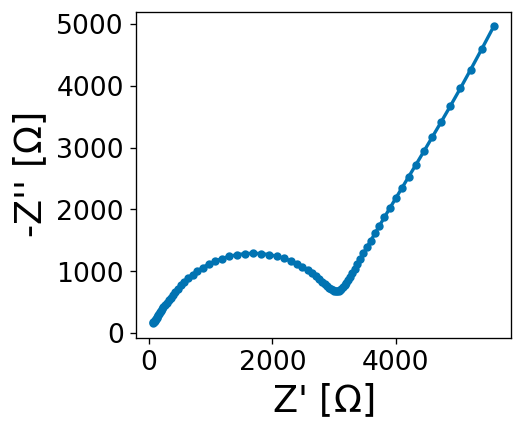

In [7]:
#Notice how the graph shows log(f) not f. We must translate back
#so instead of 1.75 and 6, we must insert 10**1.75 and 10**6
masked_mpt = mpt_data(path,data, mask = [10**6, 10**1.75])
masked_mpt.set_new_gph_dims(8,8)
masked_mpt.mpt_plot()

In [8]:
#Same initial coefficients
Rs_guess = 40

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2

masked_mpt.guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)

ITERATION NO:  1
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 428
    # data points      = 170
    # variables        = 7
    chi-square         = 134.949516
    reduced chi-square = 0.82791114
    Akaike info crit   = -25.2526061
    Bayesian info crit = -3.30201701
[[Variables]]
    Rs:   38.2313423 +/- 3.01975420 (7.90%) (init = 40)
    R:    3027.71387 +/- 15.9818657 (0.53%) (init = 2959)
    n:    0.83902909 +/- 0.00289360 (0.34%) (init = 0.8)
    fs:   22402.2719 +/- 200.153616 (0.89%) (init = 23023)
    R2:   52889.7244 +/- 6273.47480 (11.86%) (init = 258738)
    n2:   0.75706402 +/- 0.00748223 (0.99%) (init = 0.8)
    fs2:  3.14597903 +/- 0.60193027 (19.13%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -0.998
    C(n2, fs2) =  0.942
    C(R2, n2)  = -0.920
    C(R, fs)   = -0.830
    C(R, n2)   =  0.820
    C(R, n)    = -0.755
    C(n, fs)   =  0.703
    C(R, fs2)  =  0.689
    C(R, R2)   = -0.663
    C(fs,

[38.23223744972915,
 3027.6889265022855,
 0.8390324954753068,
 22402.57679511689,
 52897.68061485408,
 0.7570524729260684,
 3.1451867618990184]

# Automated Masker

The process above is ideal if all your fitting is a single mpt file. If we want to fit multiple files, or hundreds of files in a batch folder, we need a more automated process. We can call on ex_mpt.masker() to find the best window for us. 

Calling masker takes the average of the distance between the residuals and uses it as an additional threshold, so if the residual lands outside the threshold, all frequencies associated with that residual point will be omitted from the graph. We then run the guessing iterator and see if it achieves 1e-10 error within a thousand iterations. If it does not, we shrink the threshold by a factor of 0.9 to increase exclusivity. 


In [12]:
#will return a very friendly mask for us to use
ex_mpt.masker()

i-square         = 206.337616
    reduced chi-square = 1.20665273
    Akaike info crit   = 40.2959741
    Bayesian info crit = 62.5684589
[[Variables]]
    Rs:   33.4886885 +/- 3.03694104 (9.07%) (init = 40)
    R:    3000.14958 +/- 16.4774554 (0.55%) (init = 2959)
    n:    0.83869793 +/- 0.00312196 (0.37%) (init = 0.8)
    fs:   22738.5036 +/- 216.733713 (0.95%) (init = 23023)
    R2:   112814.078 +/- 20869.4551 (18.50%) (init = 258738)
    n2:   0.72954669 +/- 0.00646101 (0.89%) (init = 0.8)
    fs2:  0.94792166 +/- 0.27720917 (29.24%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -0.999
    C(n2, fs2) =  0.935
    C(R2, n2)  = -0.917
    C(R, fs)   = -0.820
    C(R, n2)   =  0.819
    C(R, n)    = -0.748
    C(n, fs)   =  0.694
    C(R, fs2)  =  0.680
    C(R, R2)   = -0.658
    C(fs, n2)  = -0.641
    C(n, n2)   = -0.515
    C(fs, fs2) = -0.514
    C(Rs, n)   =  0.511
    C(fs, R2)  =  0.495
    C(Rs, R)   = -0.421
    C(n, fs2)  = -0.411
   

(1000018.6000000008, 39.80892199999999)

In [13]:
masked_mpt = mpt_data(path,data, mask = [1000018.6000000008, 39.80892199999999])

Rs_guess = 40

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2

masked_mpt.guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)

i-square         = 206.337616
    reduced chi-square = 1.20665273
    Akaike info crit   = 40.2959741
    Bayesian info crit = 62.5684589
[[Variables]]
    Rs:   33.4886885 +/- 3.03694104 (9.07%) (init = 40)
    R:    3000.14958 +/- 16.4774554 (0.55%) (init = 2959)
    n:    0.83869793 +/- 0.00312196 (0.37%) (init = 0.8)
    fs:   22738.5036 +/- 216.733713 (0.95%) (init = 23023)
    R2:   112814.078 +/- 20869.4551 (18.50%) (init = 258738)
    n2:   0.72954669 +/- 0.00646101 (0.89%) (init = 0.8)
    fs2:  0.94792166 +/- 0.27720917 (29.24%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -0.999
    C(n2, fs2) =  0.935
    C(R2, n2)  = -0.917
    C(R, fs)   = -0.820
    C(R, n2)   =  0.819
    C(R, n)    = -0.748
    C(n, fs)   =  0.694
    C(R, fs2)  =  0.680
    C(R, R2)   = -0.658
    C(fs, n2)  = -0.641
    C(n, n2)   = -0.515
    C(fs, fs2) = -0.514
    C(Rs, n)   =  0.511
    C(fs, R2)  =  0.495
    C(Rs, R)   = -0.421
    C(n, fs2)  = -0.411
   

[33.489488674007156,
 3000.1264502872973,
 0.8387011469573208,
 22738.79172943603,
 112840.63536435792,
 0.7295372890618985,
 0.9475617098874135]

Note that there are varying amounts of iteration for convergence, you may take longer to achieve threshold